In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import env

#### 1. A bank found that the average number of cars waiting during the noon hour at a drive-up window follows a Poisson distribution with a mean of 2 cars. Make a chart of this distribution and answer these questions concerning the probability of cars waiting at the drive-up window.

What is the probability that no cars drive up in the noon hour?  

In [5]:
λ = 2 # 2 cars on average during the noon hour
car_dist = stats.poisson(λ)

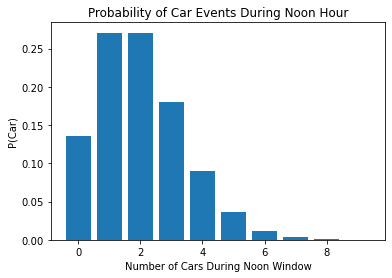

In [7]:
x = np.arange(0,10)
y = [car_dist.pmf(i) for i in x]
plt.bar(x,y)
plt.title('Probability of Car Events During Noon Hour')
plt.ylabel('P(Car)')
plt.xlabel('Number of Cars During Noon Window')
plt.show()

In [8]:
# chance that exactly zero cars show up during 
# the noon window?
# its discrete
# i can use the pmf
car_dist.pmf(0)

0.1353352832366127

In [9]:
car_dist.cdf(0)

0.1353352832366127

In [12]:
car_dist.sf(0) + car_dist.cdf(0)

1.0

What is the probability that 3 or more cars come through the drive through?  

In [13]:
# we are looking for a probability based on a value
# of 3 or more
car_dist.sf(2)

0.32332358381693654

How likely is it that the drive through gets at least 1 car?  

In [14]:
car_dist.sf(0)

0.8646647167633873

#### 2. Grades of State University graduates are normally distributed with a mean of 3.0 and a standard deviation of .3. Calculate the following:

- What grade point average is required to be in the top 5% of the graduating class?  
- What GPA constitutes the bottom 15% of the class?  
- An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. Determine the range of the third decile. Would a student with a 2.8 grade point average qualify for this scholarship?  
- If I have a GPA of 3.5, what percentile am I in?

In [15]:
# set-up:
μ = 3.0
σ = 0.3
grade_dist = stats.norm(μ, σ)

In [18]:
# What grade point average is required 
# to be in the top 5% of the graduating class?
#  <===== TOP 5% percent, coming in from the right
# side of the curve
# ISF, inverse survival function, gives us the value
# based on the percentage/probability
grade_dist.isf(.05)

3.4934560880854417

In [19]:
grade_dist.ppf(0.95)

3.4934560880854417

In [20]:
# What GPA constitutes the bottom 
# 15% of the class?

In [21]:
grade_dist.ppf(0.15)

2.689069983151863

An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. Determine the range of the third decile. Would a student with a 2.8 grade point average qualify for this scholarship?  

1st decile: 0-10 percentile  
2nd decile: 10-20 percentile   
3rd decile: 20-30 percentile

In [22]:
# I want the range of grades that will put me 
# in the bracket of 20 - 30 %

In [23]:
grade_dist.ppf((0.2,0.3))

array([2.74751363, 2.84267985])

In [25]:
lower_grade = grade_dist.ppf((0.2,0.3))[0]
higher_grade = grade_dist.ppf((0.2,0.3))[1]
lower_grade < 2.8 < higher_grade

True

If I have a GPA of 3.5, what percentile am I in?

In [26]:
grade_dist.sf(3.5)

0.0477903522728147

In [27]:
grade_dist.cdf(3.5)

0.9522096477271853

#### 3. A marketing website has an average click-through rate of 2%. One day they observe 4326 visitors and 97 click-throughs. How likely is it that this many people or more click through?

In [ ]:
# examination style 1:
# number of trials: 4326
# success rate: 0.02
# examination style 2:
# a window of 4326 ==> n * p == λ

In [28]:
λ = 4326 * 0.02

In [29]:
λ

86.52

In [33]:
click_dist = stats.binom(4326, 0.02)

In [34]:
click_dist.sf(96)

0.1397582363130086

<BarContainer object of 75 artists>

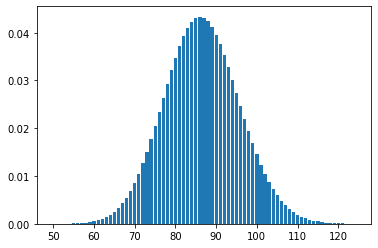

In [36]:
x = np.arange(50, 125)
y = [click_dist.pmf(i) for i in x]
plt.bar(x,y)

#### 4. You are working on some statistics homework consisting of 100 questions where all of the answers are a probability rounded to the hundreths place. Looking to save time, you put down random probabilities as the answer to each question.

- What is the probability that at least one of your first 60 answers is correct?

In [37]:
# probability is between 0 and 1
# success rate: 0.01
# number of trials: 60

In [40]:
stats.binom(60, 0.01).sf(0)

0.4528433576092388

#### 5. The codeup staff tends to get upset when the student break area is not cleaned up. Suppose that there's a 3% chance that any one student cleans the break area when they visit it, and, on any given day, about 90% of the 3 active cohorts of 22 students visit the break area. How likely is it that the break area gets cleaned up each day? How likely is it that it goes two days without getting cleaned up? All week?

In [ ]:
# what type distro?
# binomial! Number of trials: ?
# success rate: 0.03
# num trials: 3 * 22 * 0.9

In [41]:
num_trials = 3 * 22 *.9

In [44]:
num_trials = round(num_trials)

In [45]:
prob_success = 0.03

In [46]:
clean_dist = stats.binom(num_trials, prob_success)

In [47]:
clean_dist.sf(0)

0.8342199288437355

In [48]:
# two days with zero cleaning events
stats.binom(num_trials * 2, prob_success).pmf(0)

0.02748303199257622

In [49]:
stats.binom(num_trials * 5, prob_success).pmf(0)

0.00012521651388091353

#### 6. You want to get lunch at La Panaderia, but notice that the line is usually very long at lunchtime. After several weeks of careful observation, you notice that the average number of people in line when your lunch break starts is normally distributed with a mean of 15 and standard deviation of 3. If it takes 2 minutes for each person to order, and 10 minutes from ordering to getting your food, what is the likelihood that you have at least 15 minutes left to eat your food before you have to go back to class? Assume you have one hour for lunch, and ignore travel time to and from La Panaderia.

In [51]:
# mean of 15 people
# std of 3 people
# 60 minutes of lunch

In [52]:
μ = 15 * 2
σ = 3 * 2

In [53]:
lunch_distro = stats.norm(μ, σ)

In [54]:
# I have 60 minutes of lunch
# itll take me 15 minute to eat in event of success
# itll take ten minutes for my order to come
# and itll take 2 minutes for me to order

In [55]:
60 - 15 - 10 - 2

33

In [56]:
# probability that it will take 33 or less minutes
# for everyone to order before I get to?
lunch_distro.cdf(33)

0.6914624612740131

#### 7. Connect to the employees database and find the average salary of current employees, along with the standard deviation. For the following questions, calculate the answer based on modeling the employees salaries with a normal distribution defined by the calculated mean and standard deviation then compare this answer to the actual values present in the salaries dataset.

What percent of employees earn less than 60,000?  
What percent of employees earn more than 95,000?  
What percent of employees earn between 65,000 and 80,000?  
What do the top 5% of employees make?

In [2]:
url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/employees'
query = '''
SELECT *
FROM salaries s
WHERE s.to_date > NOW()
'''
salaries = pd.read_sql(query, url)

In [58]:
# salaries.head()

In [60]:
# calculate mean and std dev from the data above
μ = salaries.salary.mean()
σ = salaries.salary.std()

In [64]:
salary_dist = stats.norm(μ, σ)

In [66]:
# What percent of employees earn less than 60,000?
# prob of employees that are 60k or below? cdf
round(salary_dist.cdf(60_000) * 100, 2)

24.39

In [68]:
# What percent of employees earn more than 95,000?

round(salary_dist.sf(95_000) * 100, 2)

9.21

In [73]:
# What percent of employees earn 
# between 65,000 and 80,000?

salary_dist.cdf(80_000) - salary_dist.cdf(65_000)

0.3350605685446666

In [74]:
salary_dist.cdf((65_000,80_000))

array([0.34270292, 0.67776349])

In [77]:
# What do the top 5% of employees make?

salary_dist.isf(0.05)

100484.64454102777